In [50]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from imutils import paths
import argparse

In [51]:
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        # If local neighbourhood pixel  
        # value is greater than or equal 
        # to center pixel values then  
        # set it to 1 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        # Exception is required when  
        # neighbourhood value of a center 
        # pixel value is null i.e. values 
        # present at boundaries. 
        pass
      
    return new_value

In [52]:
# Function for calculating LBP 
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
   
    val_ar = [] 
      
    # top_left 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
      
    # top 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    # top_right 
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
      
    # right 
    val_ar.append(get_pixel(img, center, x, y + 1)) 
      
    # bottom_right 
    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
      
    # bottom 
    val_ar.append(get_pixel(img, center, x + 1, y)) 
      
    # bottom_left 
    val_ar.append(get_pixel(img, center, x + 1, y-1)) 
      
    # left 
    val_ar.append(get_pixel(img, center, x, y-1)) 
       
    # Now, we need to convert binary 
    # values to decimal 
    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val

In [53]:
def showhistogram(pix) :
    value1 = [pixel for sublist in pix for pixel in sublist]
    plt.figure()

    plt.subplot(1,1,1)
    plt.hist(value1,bins=255, edgecolor='black')
    plt.title('lbp')

In [54]:
def read_images_from_folders(root_folder, exclude_folders=None):
    images = []
    valid_image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']

    if exclude_folders is None:
        exclude_folders = set()

    for folder_name in os.listdir(root_folder):
        if folder_name not in exclude_folders and os.path.isdir(os.path.join(root_folder, folder_name)):
            folder_path = os.path.join(root_folder, folder_name)
            
            for filename in os.listdir(folder_path):
                if any(filename.lower().endswith(ext) for ext in valid_image_extensions):
                    image_path = os.path.join(folder_path, filename)
                    img = cv2.imread(image_path)
                    # Calculate the new dimensions based on the percentage scale
                    scale_percent = 50
                    width = int(img.shape[1] * scale_percent / 100)
                    height = int(img.shape[0] * scale_percent / 100)
                    new_dimensions = (width, height)

                    # Resize the image
                    img = cv2.resize(img, new_dimensions, interpolation=cv2.INTER_AREA)
                    

                    if img is not None:
                        images.append((folder_name, filename, img))

    return images

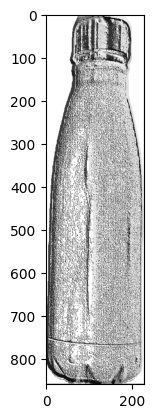

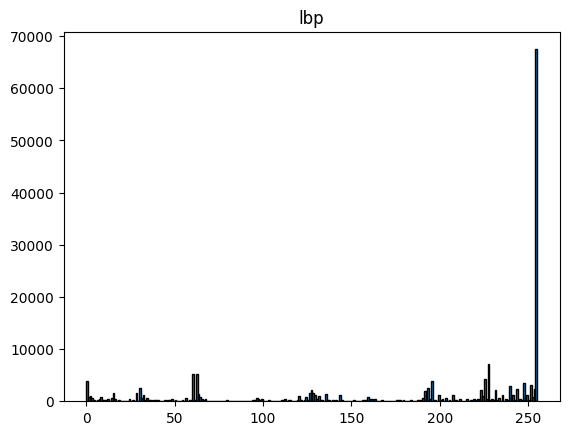

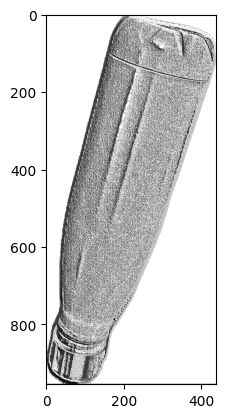

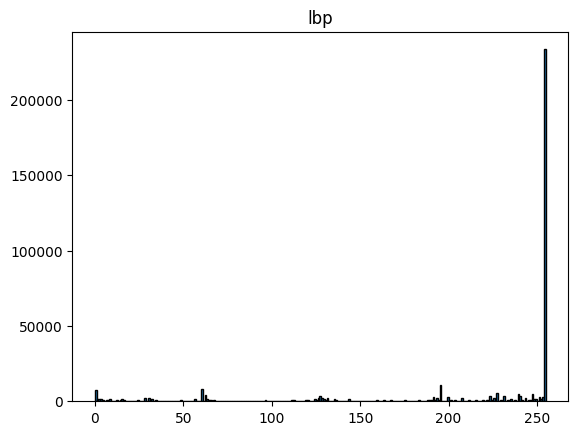

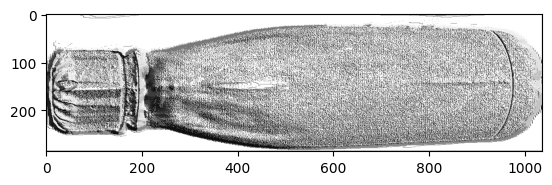

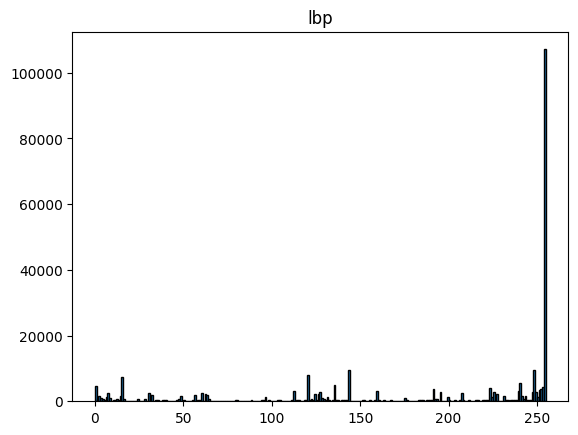

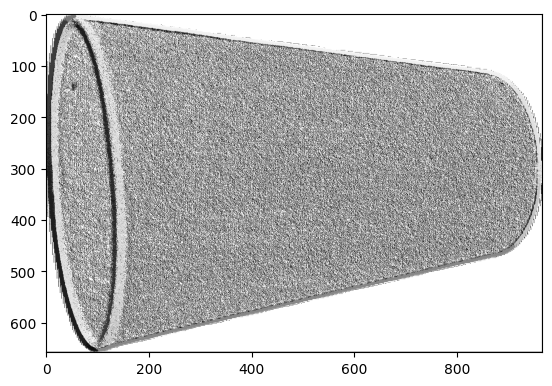

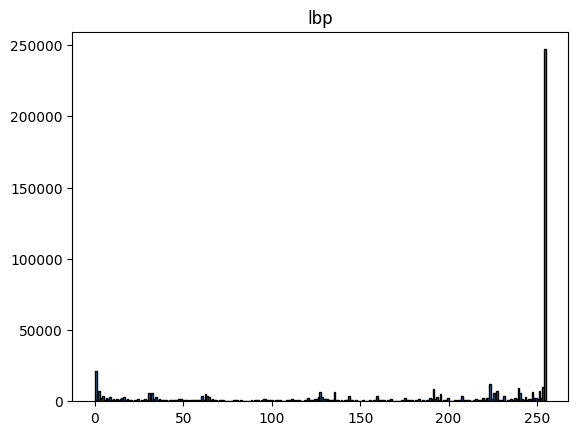

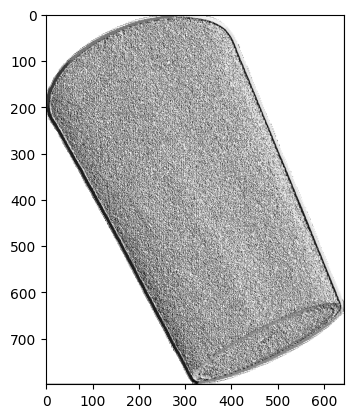

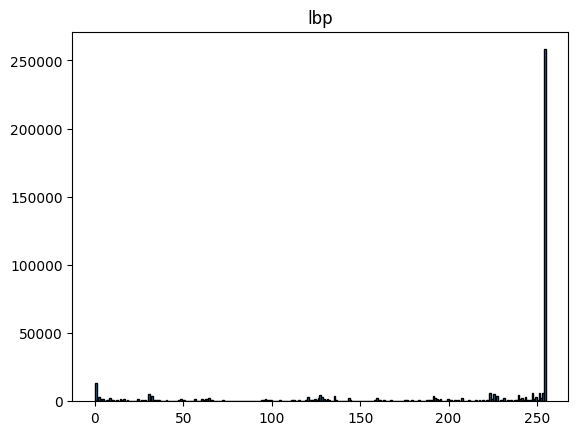

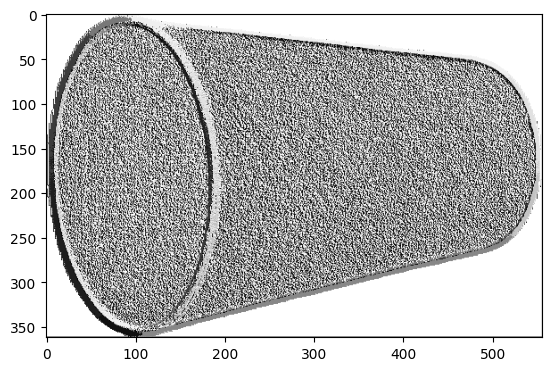

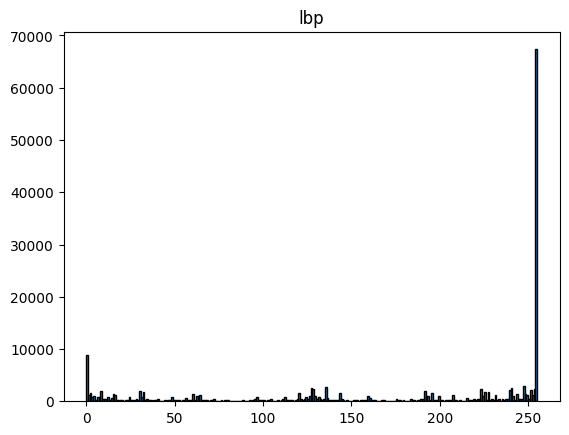

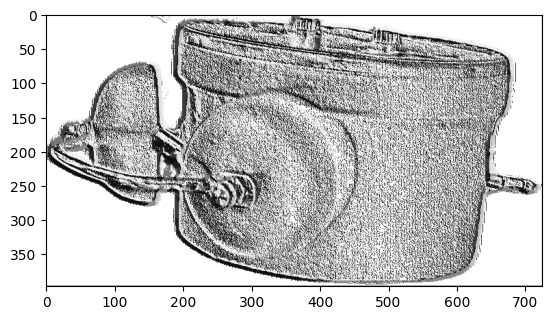

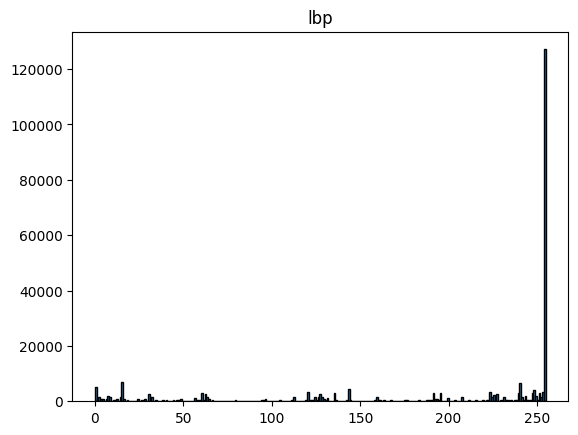

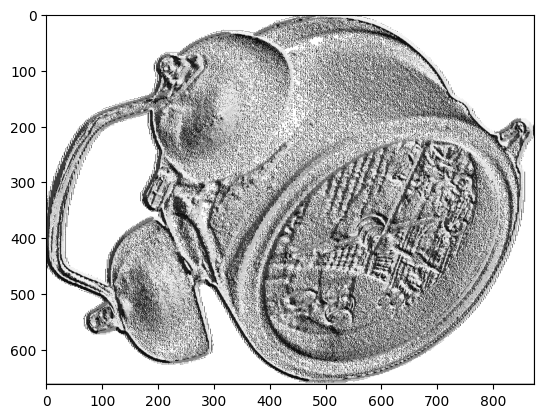

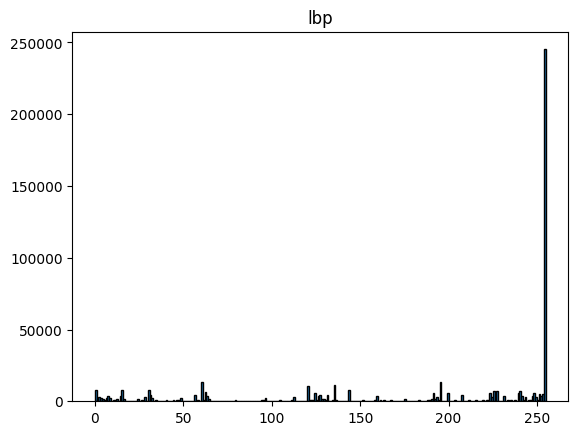

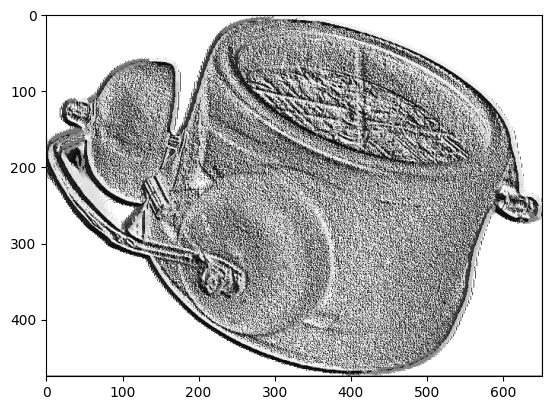

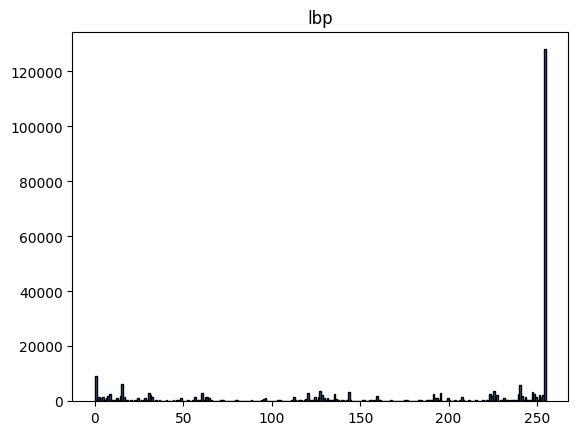

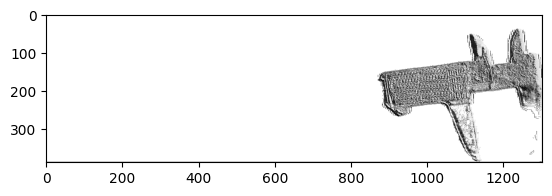

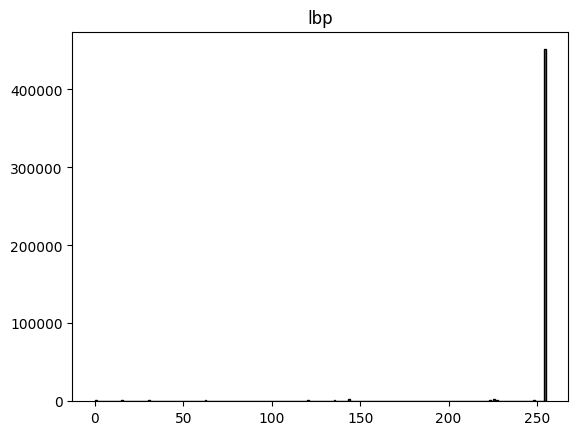

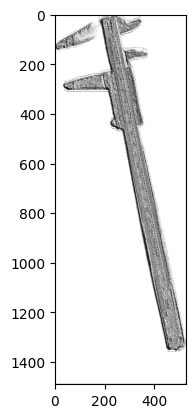

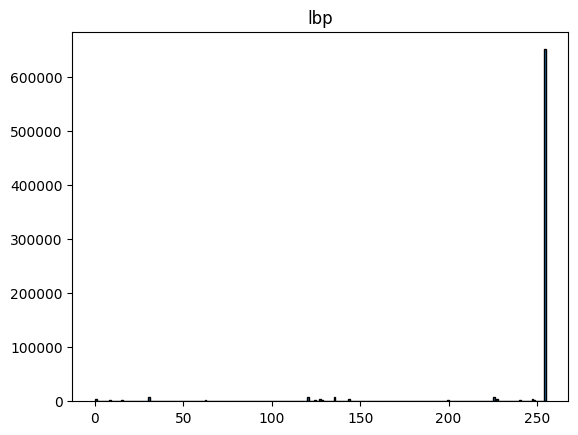

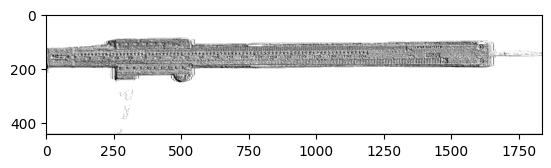

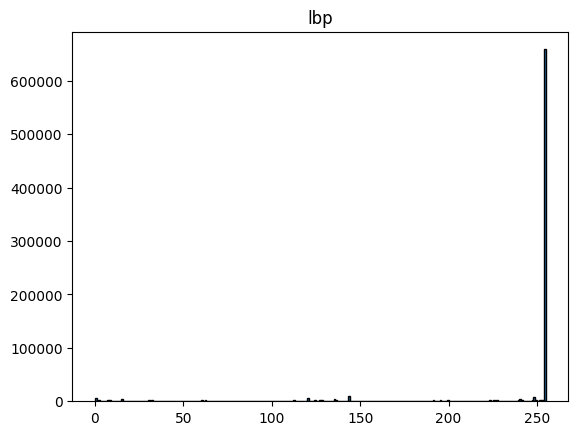

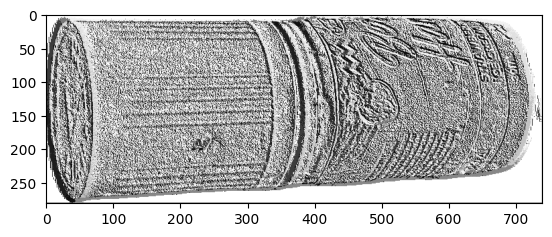

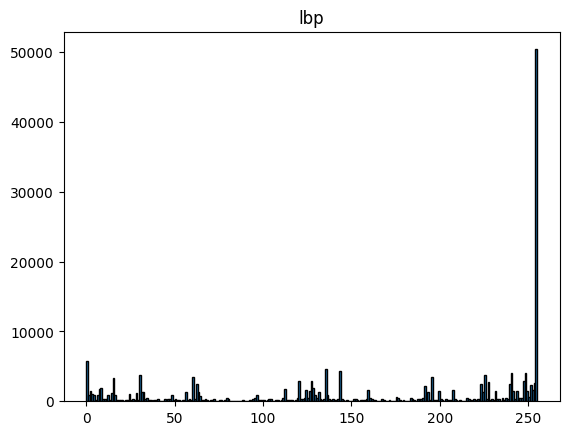

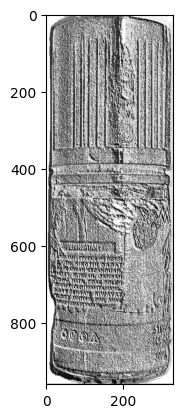

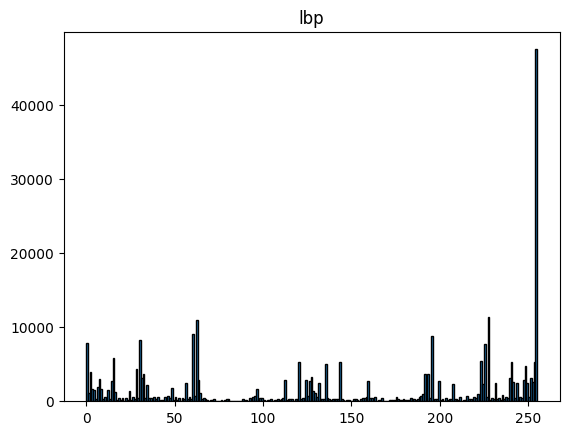

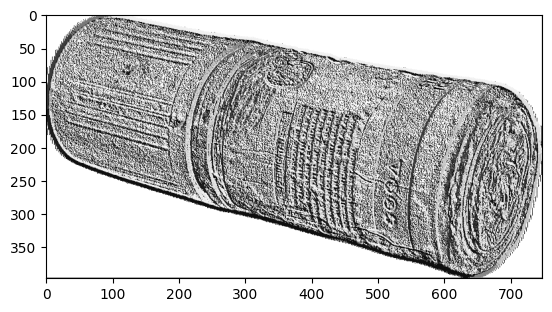

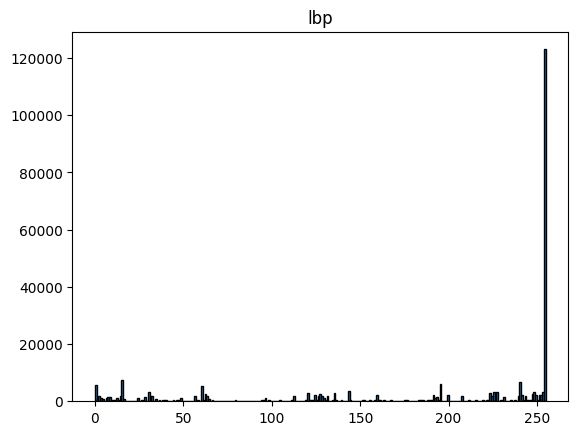

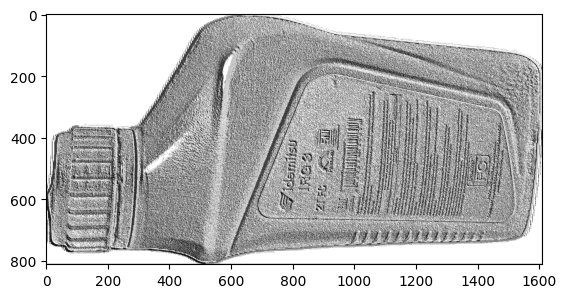

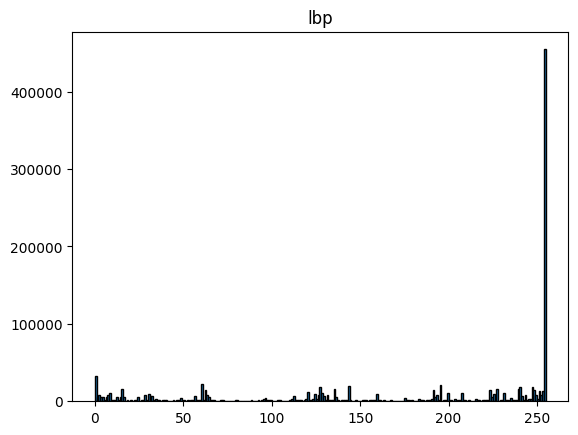

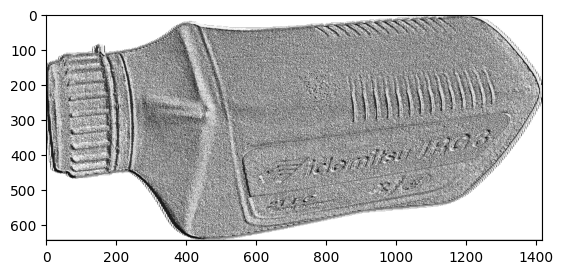

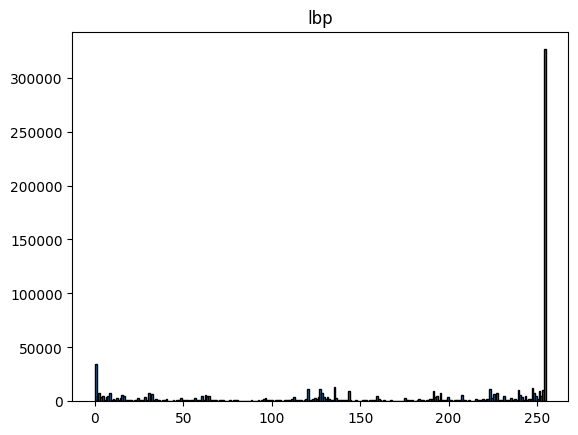

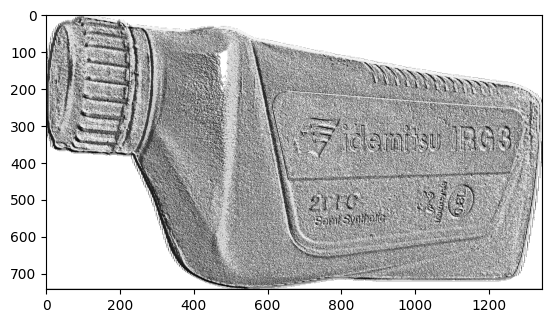

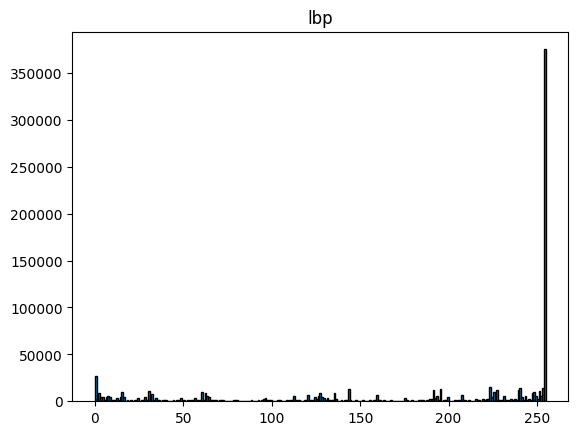

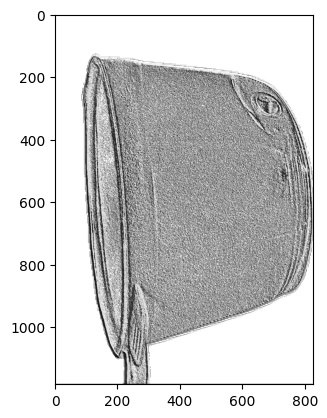

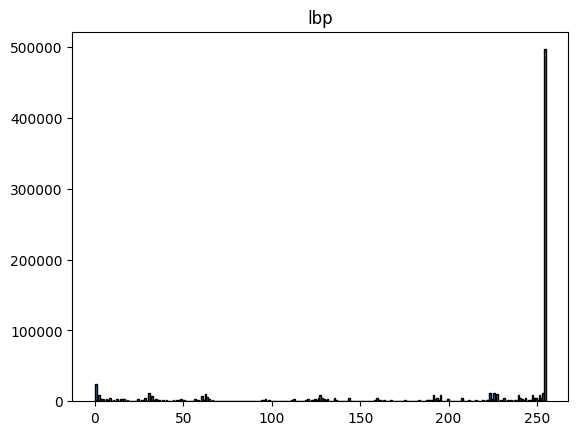

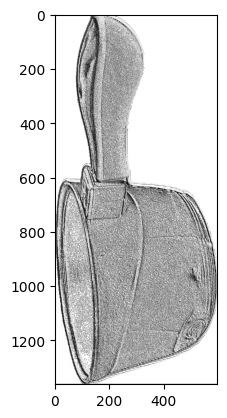

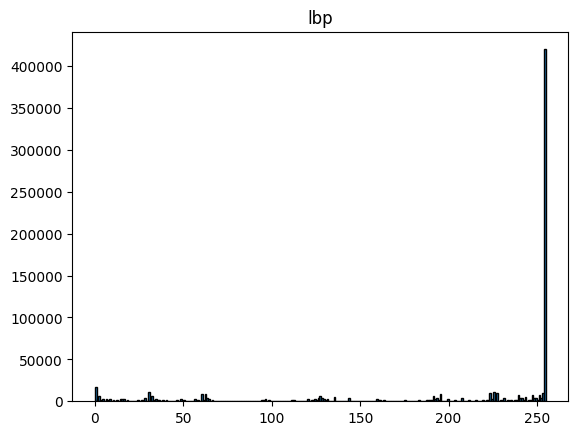

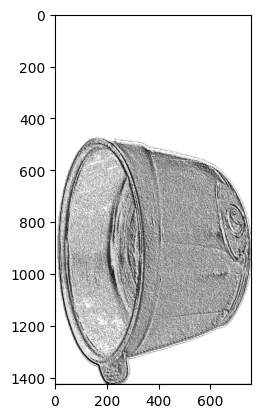

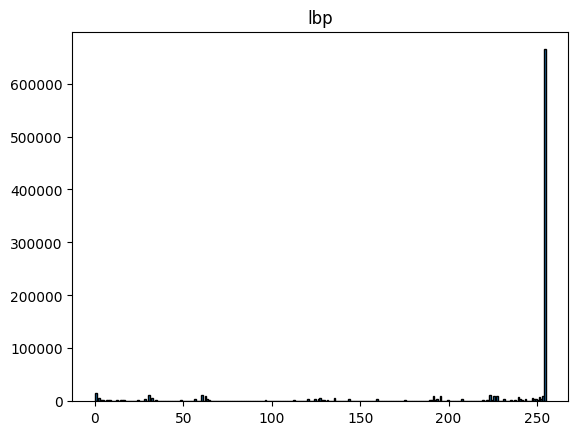

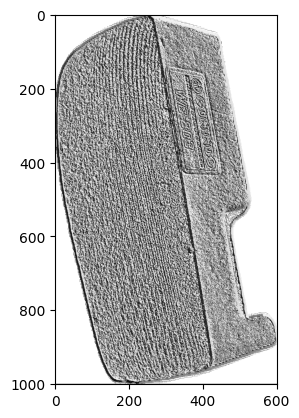

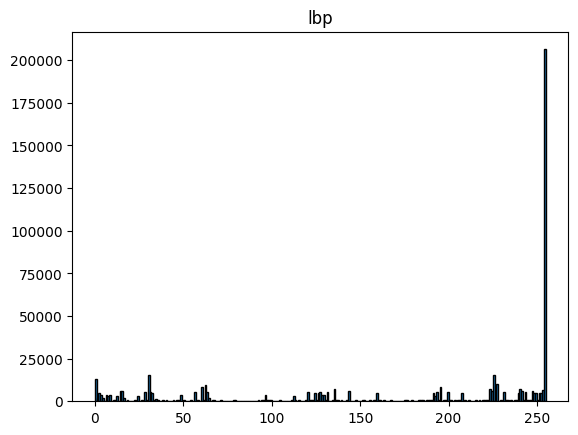

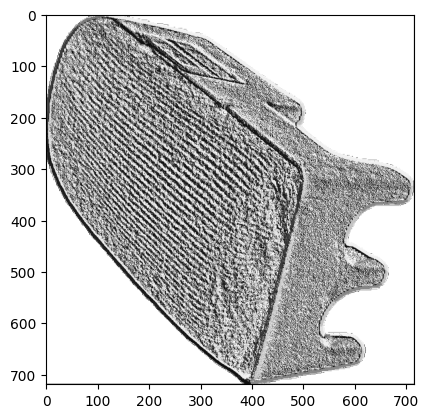

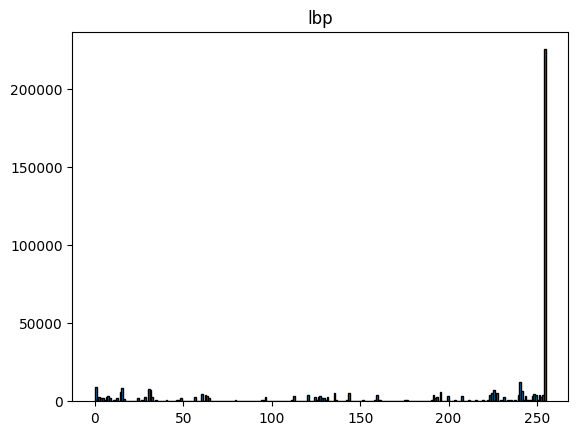

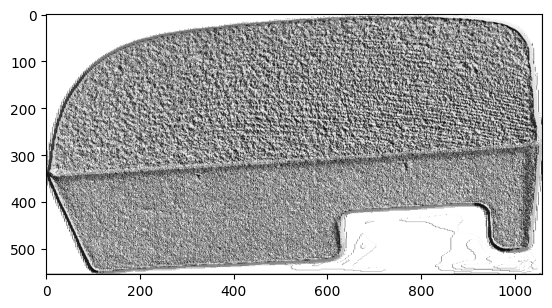

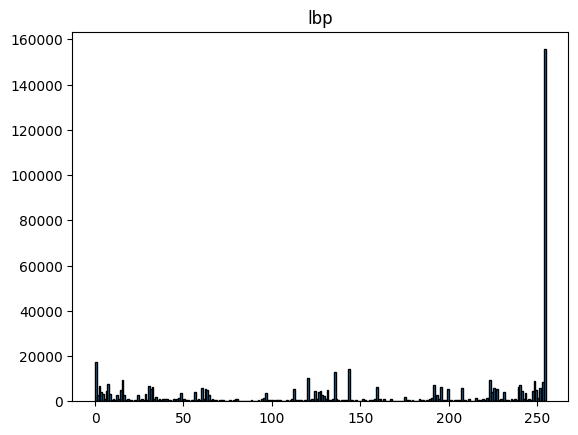

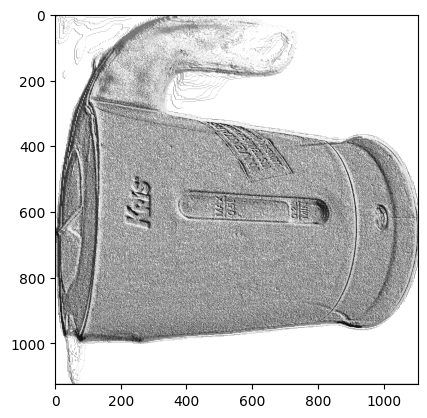

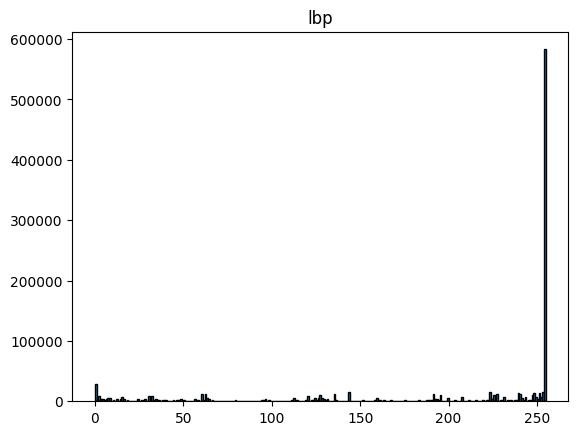

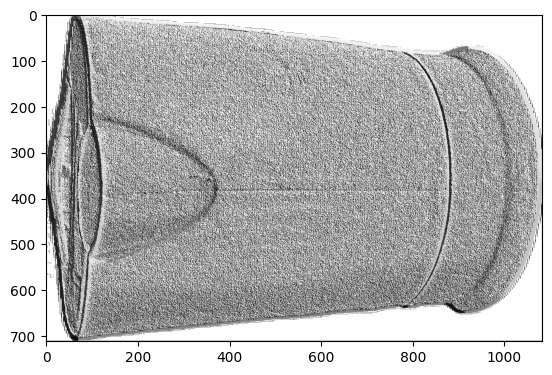

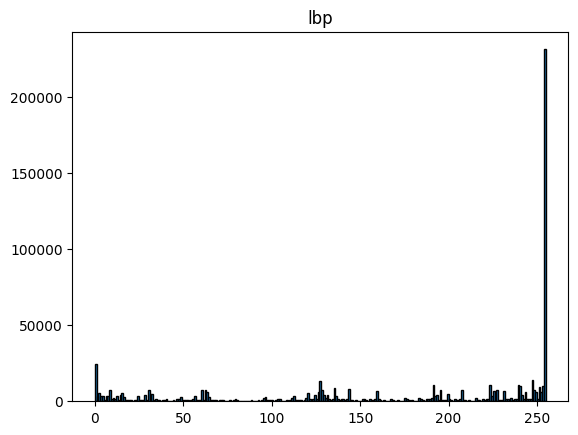

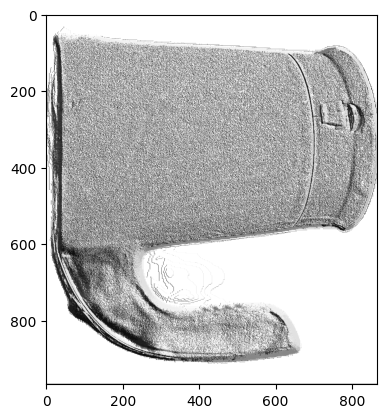

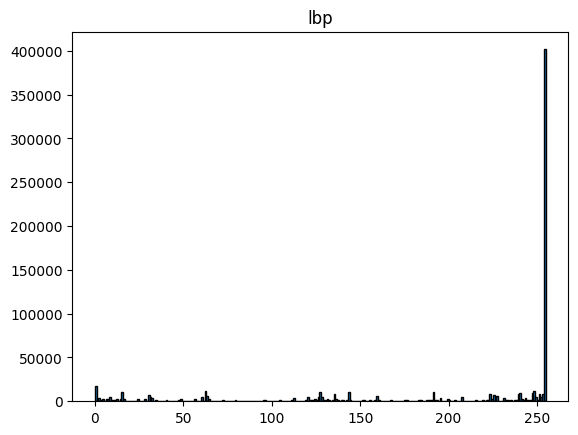

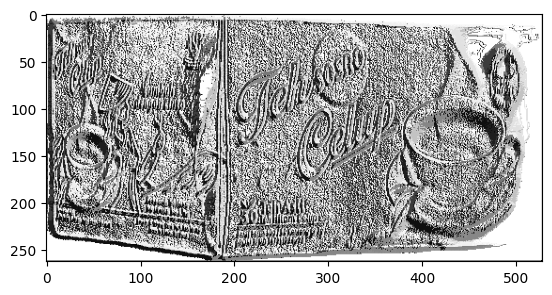

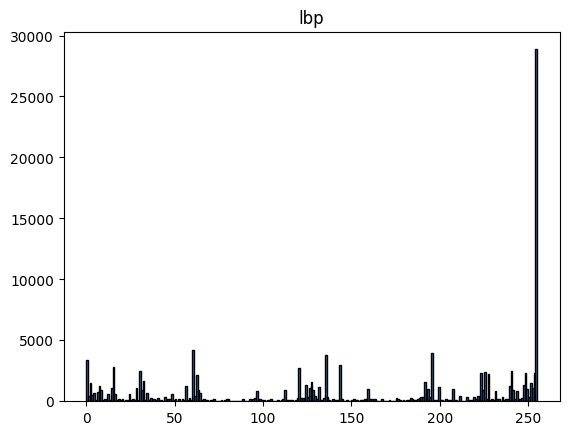

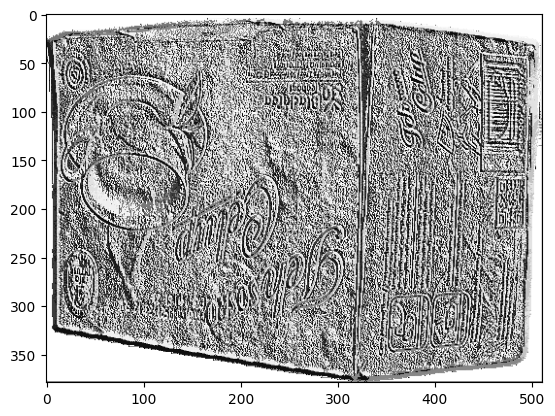

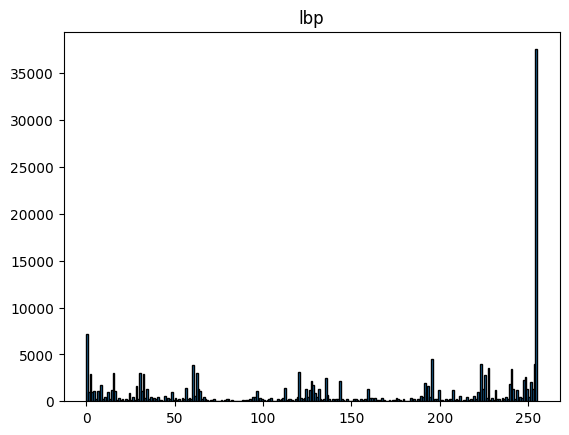

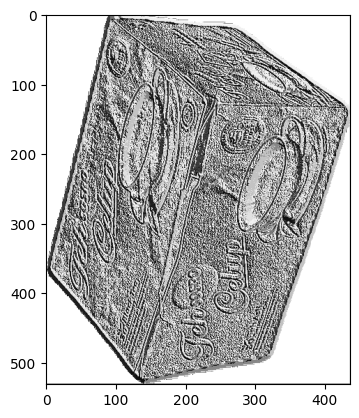

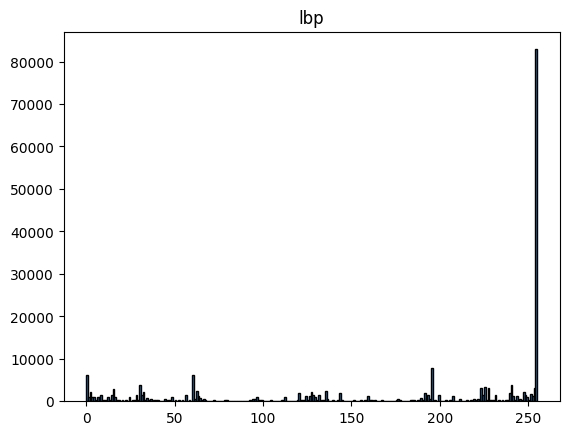

In [55]:
# Example usage:
parent_folder = r"C:\Users\raiva\OneDrive - Institut Teknologi Sepuluh Nopember\file laptop\D\VIVAT\ITS\7th Semester\DSEC\FP\image_recognition\no4\images\Train"  # Use r"..." for raw string on Windows
exclude =None

try:
    file_list = read_images_from_folders(parent_folder, exclude)

    # Now file_list contains a list of paths to all files in every subfolder.
    # You can iterate through the list and perform further processing on each file.
    for foldername, filename, img in file_list:
        height, width, _ = img.shape 
   
        # We need to convert RGB image  
        # into gray one because gray  
        # image has one channel only. 
        img_gray = cv2.cvtColor(img, 
                        cv2.COLOR_BGR2GRAY) 
   
        # Create a numpy array as  
        # the same height and width  
        # of RGB image 
        img_lbp = np.zeros((height, width), 
                   np.uint8)
   
        for i in range(0, height): 
            for j in range(0, width): 
                img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j) 
   
        plt.imshow(img_lbp, cmap ="gray")
        showhistogram(img_lbp)
        plt.show() 
        

except Exception as e:
    print(f"An error occurred: {e}")